In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#Read in data
data = pd.read_csv('Resources/wildfires_ml5.csv')
data.head()

,CAUSE,FIRE_YEAR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,DURATION,MONTH,DAY_OF_WEEK,OWNER
0,4,2005,40.036944,-121.005833,4,0.10,0.0,2,2,3
1,1,2004,38.933056,-120.404444,4,0.25,0.0,5,2,3
2,2,2004,38.984167,-120.735556,4,0.10,0.0,5,0,5
3,1,2004,38.559167,-119.913333,4,0.10,5.0,6,0,3
4,1,2004,38.559167,-119.933056,4,0.10,5.0,6,0,3


In [3]:
#remove MISC causes
df = data[data["CAUSE"] < 4]
len(df)

754220

In [4]:
#Set independent variables
X = df.iloc[:,1:10]
X.head()

,FIRE_YEAR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,DURATION,MONTH,DAY_OF_WEEK,OWNER
1,2004,38.933056,-120.404444,4,0.25,0.0,5,2,3
2,2004,38.984167,-120.735556,4,0.10,0.0,5,0,5
3,2004,38.559167,-119.913333,4,0.10,5.0,6,0,3
4,2004,38.559167,-119.933056,4,0.10,5.0,6,0,3
5,2004,38.635278,-120.103611,4,0.10,1.0,6,2,3


In [5]:
y = df.iloc[:,0]

In [6]:
print(X.shape, y.shape)

(754220, 9) (754220,)


In [7]:
#Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=200)
clf_rf = clf_rf.fit(X_train_scaled, y_train)
print(clf_rf.score(X_test_scaled,y_test))

0.7989552120071067


In [10]:
from sklearn import tree
tr = tree.DecisionTreeClassifier()
tr = tr.fit(X_train_scaled, y_train)
tr.score(X_test_scaled,y_test)

0.7279838773832569

In [16]:
print(tr.tree_.max_depth)

47


In [23]:
tr1 = tree.DecisionTreeClassifier(criterion='gini', max_depth=12)
tr1 = tr1.fit(X_train_scaled, y_train)
tr1.score(X_test_scaled,y_test)

0.7538224921110551

In [11]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train_scaled, y_train)
gnb.score(X_test_scaled,y_test)

0.48799554506642623

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbc = gbc.fit(X_train_scaled, y_train)
gbc.score(X_test_scaled, y_test)

0.7251942404073082

In [24]:
#Random Forest Model
importance_data = sorted(list(zip(X.columns,clf_rf.feature_importances_)), key=lambda tpl:tpl[1], reverse=True)

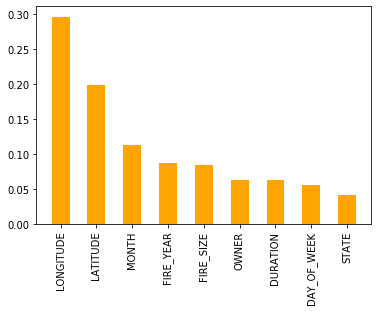

In [38]:
xs = range(len(importance_data))
labels = [x for (x,_) in importance_data]
ys = [y for (_,y) in importance_data]

plt.bar(xs, ys, width=0.5, color="orange")
plt.xticks(xs, labels, rotation=90)
plt.show()

In [26]:
importance_data

[('LONGITUDE', 0.29629805489072325),
 ('LATITUDE', 0.19830414040484817),
 ('MONTH', 0.11311668831688997),
 ('FIRE_YEAR', 0.08676128411779306),
 ('FIRE_SIZE', 0.08350750540708564),
 ('OWNER', 0.06334280238785067),
 ('DURATION', 0.062375389236346675),
 ('DAY_OF_WEEK', 0.05503295088927304),
 ('STATE', 0.0412611843491895)]

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = clf_rf.predict(X_test_scaled)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[49366  6779   817]
 [ 7099 80522  7620]
 [ 1223 14370 20759]]
              precision    recall  f1-score   support

           1       0.86      0.87      0.86     56962
           2       0.79      0.85      0.82     95241
           3       0.71      0.57      0.63     36352

    accuracy                           0.80    188555
   macro avg       0.79      0.76      0.77    188555
weighted avg       0.80      0.80      0.80    188555



In [28]:
import itertools

In [29]:
matrix = confusion_matrix(y_test, predictions)

In [30]:
class_names = ['Nature','Accident','Intentional']

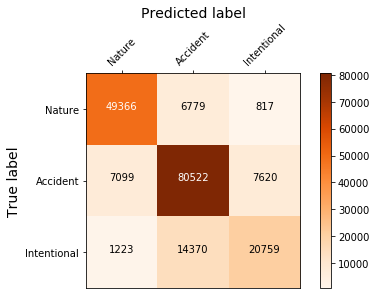

In [31]:
plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Oranges)

# plot colorbar to the right
plt.colorbar()
    
fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")
    
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.show()

In [32]:
y_score = clf_rf.predict_proba(X_test_scaled)

In [33]:
#Binarize the output
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])
n_classes = y_test_bin.shape[1]

In [36]:
from sklearn import metrics
from sklearn.metrics import roc_curve

AUC for Class 1: 0.9684459114042805
AUC for Class 2: 0.8938616118537981
AUC for Class 3: 0.9005049039297892


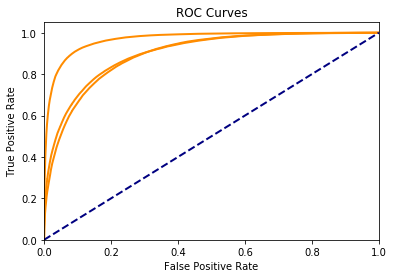

In [37]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC for Class {}: {}'.format(i+1, metrics.auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.show()

In [39]:
#Decision Tree Model
importance_data_t = sorted(list(zip(X.columns,tr1.feature_importances_)), key=lambda tpl:tpl[1], reverse=True)

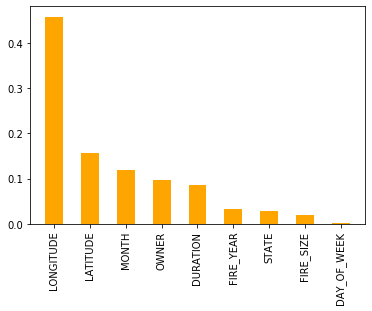

In [40]:
xs = range(len(importance_data_t))
labels = [x for (x,_) in importance_data_t]
ys = [y for (_,y) in importance_data_t]

plt.bar(xs, ys, width=0.5, color="orange")
plt.xticks(xs, labels, rotation=90)
plt.show()

In [41]:
importance_data_t

[('LONGITUDE', 0.4581621513673628),
 ('LATITUDE', 0.15572536313640198),
 ('MONTH', 0.11973057460908773),
 ('OWNER', 0.09723515359265392),
 ('DURATION', 0.08590833682111952),
 ('FIRE_YEAR', 0.0324352966144776),
 ('STATE', 0.029210683545421938),
 ('FIRE_SIZE', 0.019146244221906274),
 ('DAY_OF_WEEK', 0.002446196091568205)]

In [42]:
predictions_t = tr1.predict(X_test_scaled)
print(confusion_matrix(y_test, predictions_t))
print(classification_report(y_test, predictions_t))

[[46788  9197   977]
 [ 9359 77919  7963]
 [ 1461 17461 17430]]
              precision    recall  f1-score   support

           1       0.81      0.82      0.82     56962
           2       0.75      0.82      0.78     95241
           3       0.66      0.48      0.56     36352

    accuracy                           0.75    188555
   macro avg       0.74      0.71      0.72    188555
weighted avg       0.75      0.75      0.75    188555



In [43]:
matrix_t = confusion_matrix(y_test, predictions_t)

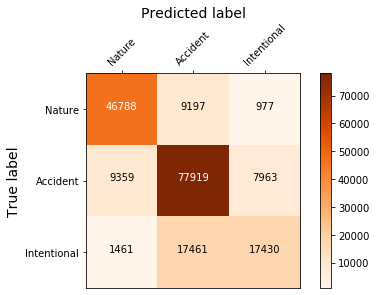

In [44]:
plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix_t, interpolation='nearest', cmap=plt.cm.Oranges)

# plot colorbar to the right
plt.colorbar()
    
fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix_t.max() / 2.
for i, j in itertools.product(range(matrix_t.shape[0]), range(matrix_t.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix_t[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix_t[i, j] > thresh else "black")
    
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.show()

In [45]:
y_score_t = tr1.predict_proba(X_test_scaled)

In [46]:
y_test_bin_t = label_binarize(y_test, classes=[1, 2, 3])
n_classes = y_test_bin_t.shape[1]

AUC for Class 1: 0.942139268585488
AUC for Class 2: 0.846149765001664
AUC for Class 3: 0.8613555728942505


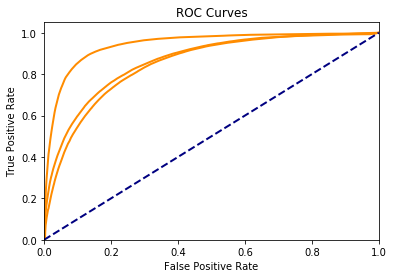

In [47]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin_t[:, i], y_score_t[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC for Class {}: {}'.format(i+1, metrics.auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.show()

In [48]:
#Gradient Boost Model
importance_data_g = sorted(list(zip(X.columns,gbc.feature_importances_)), key=lambda tpl:tpl[1], reverse=True)

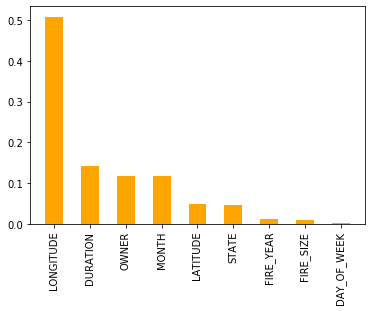

In [49]:
xs = range(len(importance_data_g))
labels = [x for (x,_) in importance_data_g]
ys = [y for (_,y) in importance_data_g]

plt.bar(xs, ys, width=0.5, color="orange")
plt.xticks(xs, labels, rotation=90)
plt.show()

In [50]:
importance_data_g

[('LONGITUDE', 0.5080087385112282),
 ('DURATION', 0.14129326675558548),
 ('OWNER', 0.11831145265019191),
 ('MONTH', 0.11683510032997323),
 ('LATITUDE', 0.04756709426466289),
 ('STATE', 0.04539131195066282),
 ('FIRE_YEAR', 0.0114804367998476),
 ('FIRE_SIZE', 0.009861372520081815),
 ('DAY_OF_WEEK', 0.001251226217766068)]

In [51]:
predictions_g = gbc.predict(X_test_scaled)
print(confusion_matrix(y_test, predictions_g))
print(classification_report(y_test, predictions_g))

[[46463  9950   549]
 [11664 77872  5705]
 [ 2050 21898 12404]]
              precision    recall  f1-score   support

           1       0.77      0.82      0.79     56962
           2       0.71      0.82      0.76     95241
           3       0.66      0.34      0.45     36352

    accuracy                           0.73    188555
   macro avg       0.72      0.66      0.67    188555
weighted avg       0.72      0.73      0.71    188555



In [52]:
matrix_g = confusion_matrix(y_test, predictions_g)

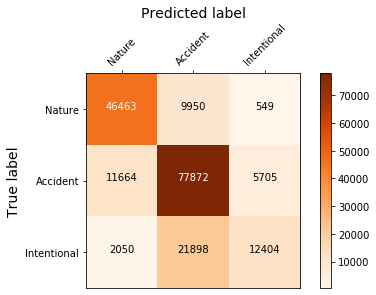

In [53]:
plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix_g, interpolation='nearest', cmap=plt.cm.Oranges)

# plot colorbar to the right
plt.colorbar()
    
fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix_g.max() / 2.
for i, j in itertools.product(range(matrix_g.shape[0]), range(matrix_g.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix_g[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix_g[i, j] > thresh else "black")
    
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.show()

In [54]:
y_score_g = gbc.predict_proba(X_test_scaled)

In [55]:
y_test_bin_g = label_binarize(y_test, classes=[1, 2, 3])
n_classes = y_test_bin_g.shape[1]

AUC for Class 1: 0.9362996839142382
AUC for Class 2: 0.81438036611356
AUC for Class 3: 0.828631455182417


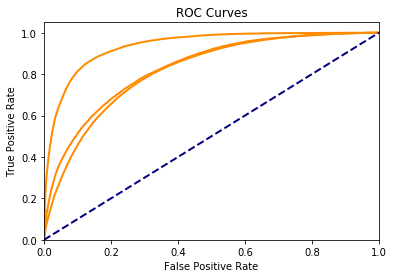

In [56]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin_g[:, i], y_score_g[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC for Class {}: {}'.format(i+1, metrics.auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.show()